## Assignment Week 10 - Due Week 11

### 1. Use the Breast Cancer Wisconsin (Diagnostic) dataset to select the best decision tree structure that has the minimum testing error.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
X,y = load_breast_cancer(return_X_y=True)
#randomly split the dataset. By default, the test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

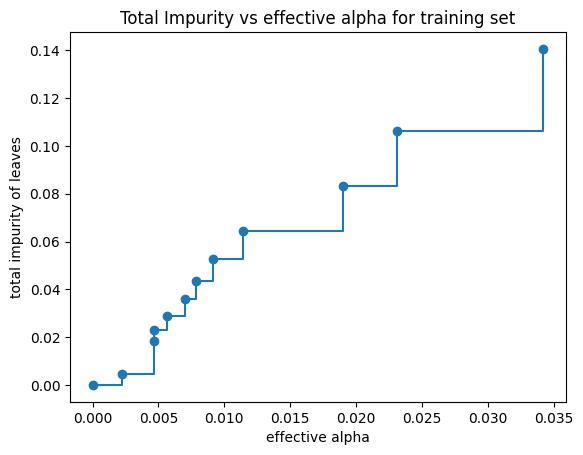

In [3]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train) #seeking alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities #output apha and tree impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [4]:
clfs = [] #this list will be used to store a list of Decision Tree Models with different penalty alpha values.
for alpha in ccp_alphas:
    print('the penalty term alpha is %f' %alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha) # induce a tree using the ccp_alpha value
    clf.fit(X_train, y_train)
    clfs.append(clf)

the penalty term alpha is 0.000000
the penalty term alpha is 0.002266
the penalty term alpha is 0.004647
the penalty term alpha is 0.004660
the penalty term alpha is 0.005634
the penalty term alpha is 0.007042
the penalty term alpha is 0.007842
the penalty term alpha is 0.009114
the penalty term alpha is 0.011444
the penalty term alpha is 0.018988
the penalty term alpha is 0.023142
the penalty term alpha is 0.034225
the penalty term alpha is 0.327298


Text(0, 0.5, 'test error')

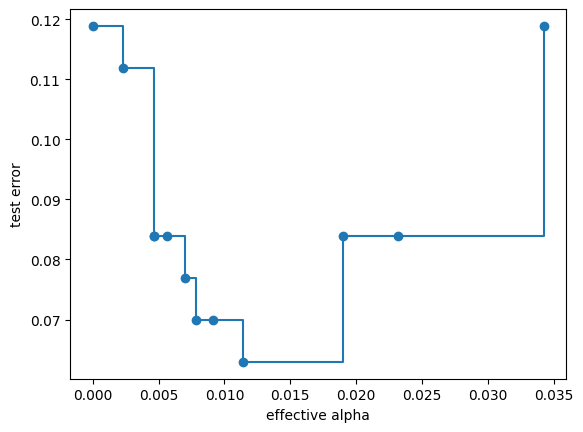

In [5]:
from sklearn.metrics import accuracy_score
test_errors = []
for clf in clfs:
    y_predTest = clf.predict(X_test)
    test_error = 1-accuracy_score(y_predTest,y_test)
    test_errors.append(test_error)
fig,ax = plt.subplots()
ax.plot(ccp_alphas[:-1], test_errors[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("test error")

In [6]:
print("The clf9 with effective alpha {} has test error in {} is the best".format(ccp_alphas[8],test_errors[8]))

The clf9 with effective alpha 0.011443661971830986 has test error in 0.06293706293706292 is the best


### 2. Does the Breast Cancer Wisconsin (Diagnostic) dataset has imbalanced issue? If so, select the best model according to your own evaluation metric and report the result

[[52  1]
 [ 8 82]]


c:\Users\niaoniaoniao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


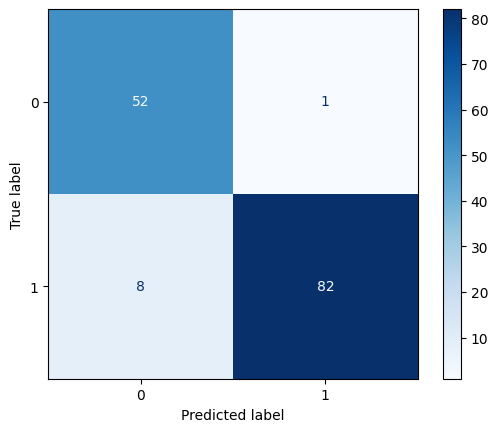

In [7]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
disp = plot_confusion_matrix(clfs[8], X_test, y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
print(disp.confusion_matrix)
#as the graph shows it has slight imbalance issue

0.04195804195804198
[[50  3]
 [ 3 87]]


c:\Users\niaoniaoniao\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


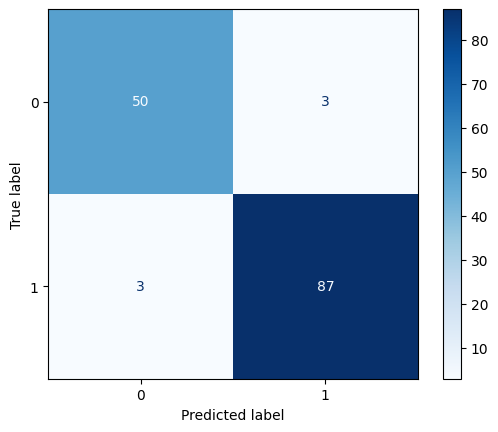

In [8]:
weights = {0:5.3, 1:9.0}
clf = DecisionTreeClassifier(random_state=0, class_weight=weights,ccp_alpha=ccp_alphas[8])
clf.fit(X_train, y_train)
y_predTest = clf.predict(X_test)
test_error = 1-accuracy_score(y_predTest,y_test)
print(test_error)
disp = plot_confusion_matrix(clf, X_test, y_test,values_format = '.0f',cmap=plt.cm.Blues)
np.set_printoptions(precision=1)
print(disp.confusion_matrix)

### 3. Use 5-fold cross-validation to select the best tree structure for the Breast Cancer Wisconsin (Diagnostic) dataset.

In [9]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6),
}
clf = DecisionTreeClassifier(random_state=0,class_weight=weights,ccp_alpha=ccp_alphas[8])
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy',refit=True)
grid_search.fit(X, y)
best_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best score: {best_score:.4f}")
print(f"Best params: {best_params}")

Best score: 0.9473
Best params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


### 4. Use the same dataset, compare the performance of the best tree structure and the Random Forest method. Which model do you prefer?

In [10]:
#Best tree structure
clf1 = DecisionTreeClassifier(random_state=0,class_weight=weights,ccp_alpha=ccp_alphas[8],
                             criterion='entropy',max_depth=4,min_samples_leaf=3,min_samples_split=2)
scores = cross_val_score(clf1,X,y,scoring='accuracy',cv=5)
print(scores.mean())

0.9473373699736065


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=0,max_depth=5,class_weight={0:5.3,1:9.0},n_estimators=10, max_features=2)
scores = cross_val_score(clf2,X,y,scoring='accuracy',cv=5)
print(scores.mean())

0.956078248719143


I prefer Random Forest, because it has better accuracy.